In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Moving Average Smoothing

Moving average smoothing is a naive and effective technique in time series forecasting. It can be used for data preparation, feature engineering, and even directly for making predictions. 

Smoothing is the technique used to remove the fine-grained variation between time steps. The goal of smmoothing is to remove noise and better expose the signal of the underlying causal process. 

Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series.

A moving average requires specifying a window size, which is called window width. Window width defiens the number of raw observations used to calculate the moving average value. The moving part in the moving average refers to the fact that the window defined by the window width is slid along the time series to calcuate the average values in the new series. 

There are two main types of moving average: 

1. Centerned moving average
2. Trailling moving average

center-ma(t) = mean(obs(t-1), obs(t), obs(t+1))

This method requires knowledge of future values, and as such is used on time series analysis to better understand the dataset. A center moving average can be used as a general method to remove trend and seasonal components from a time series. 

trial_ma(t) = mean(abs(obs(t-2), obs(t-1), obs(t))

Trailling moving average only uses histofical observations and is used on time series forecasting.

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
1959-01-06    34.666667
1959-01-07    39.333333
1959-01-08    39.000000
1959-01-09    42.000000
1959-01-10    36.000000
Name: Births, dtype: float64


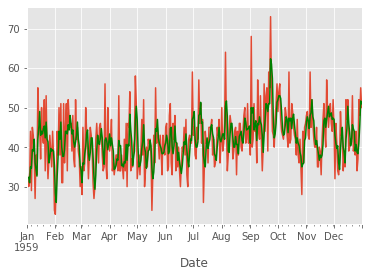

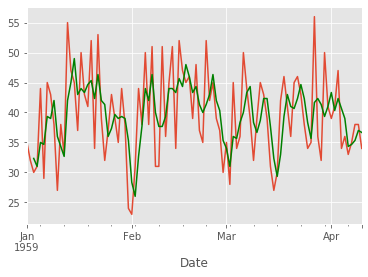

In [4]:
series = pd.read_csv('daily-total-female-births.csv',
                    header=0,
                    index_col=0,
                    parse_dates=True,
                    squeeze=True)
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

series.plot()
rolling_mean.plot(color='green')
plt.show()

series[:100].plot()
rolling_mean[:100].plot(color='green')
plt.show()

In [6]:
series = pd.read_csv('daily-total-female-births.csv',
                    header=0,
                    index_col=0,
                    parse_dates=True,
                    squeeze=True)

df = pd.DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width-1)
window = lag3.rolling(window=width)
means = window.mean()

df = pd.concat([means, lag1, df], axis=1)
df.columns = ['mean', 't', 't+1']

df.head(10)

,mean,t,t+1
0,NaN,NaN,35
1,NaN,35.0,32
2,NaN,32.0,30
3,NaN,30.0,31
4,32.333333,31.0,44
5,31.000000,44.0,29
6,35.000000,29.0,45
7,34.666667,45.0,43
8,39.333333,43.0,38
9,39.000000,38.0,27


## White Noise

A time series is white noise when the variables are independent and identically distributed with a mean of zero. This means all the variables have the same variance (sigma**2) and each value as a zero correlation with all other values in the series.

White noise is an important concept in time series:
1. Predictability: if a time series is white noise, then it is random, we cannot reasonably model it and make predictions.
2. Model diagnostics: the series of erros from a time series forecast model should idealy be white noise. Time series data are expected to contain some white noise componant on top of the signal generated by the underlying process.

    y(t) = signal(t) + noise(t)

Once predicitons have been made by a time series forecast model, they can be collected and analyzed. The series of forecast errors should ideally be white noise. When forecast errors are white noise, it means that all of the signal information in the time series has been harnessed by the model in order to make predicitons. All that left is random fluctuations that cannot be modeled.

### Check if time series is white noise:

1. have a non-zero mean?
2. variance change over time?
3. values correlate with lag values?


Tools to check white noise:

1. create a line plot
2. calculate summary statistics
3. create an autocorrelation plot.

## Random Walk

Random walk helps understand the predictability of your time series forecast problem.


In [8]:
from random import seed
from random import randrange

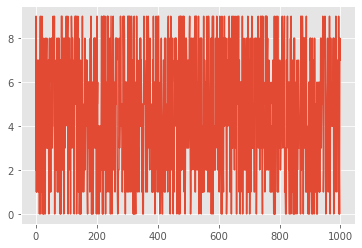

In [9]:
seed(1)
series = [randrange(10) for i in range(1000)]
plt.plot(series)
plt.show()

This is not random walk, this is white noise.

Randome walk is different from a list of random numbers, because the next value in the sequence is a modification of the previous value in the sequence. The process used to generate the series forces dependence from one-time steo to the enxt. This dependence provides some consistency from step to steo rather than the large jumps that a series of indeoendent, random numbers provides.

A simple model of random walk is :
1. start with a random number of either -1 or 1.
2. Randomly select a -1 or 1 and add it to the observation from the previous time step. 
3. Repeat step2 for as long as you like. 

y(t) = B0 + B1 * X(t-1) + e(t)

Becasue randome walk is constructed and the observations in a random walk are dependent on time. The current observation is a random step from the previous observation. Therefore,, all random walk processes are non-stationarity. 

Nevertheless, not all non-stationary series are random walk.

#### A radnom walk is unpredictable. It cannot reasonably be predicted.

A random walk is one in which future steps or directions cannot be predicted on the
basis of past history. When the term is applied to the stock market, it means that
short-run changes in stock prices are unpredictable.
— Page 26, A Random Walk Down Wall Street.

## Decomposition

#### Automatic time series decomposition

from statesmodels.tsa.seasonal import seasonal_decompose
series = ...
result = seasonal_decompose(series, model='additive')
print(result.trend, result.season, result.resid, result.observed)

result.plot()
plt.show()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange

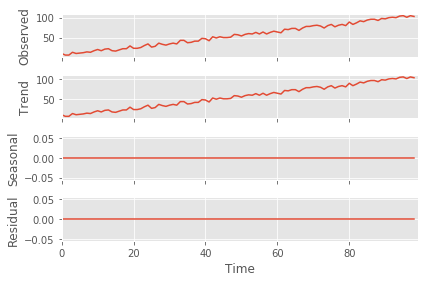

In [12]:
series = [i + randrange(10) for i in range(1, 100)]
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
plt.show()


The Residual plot shows zero, because the naive decomposition was not able to seperate the noise from the linear trend. 

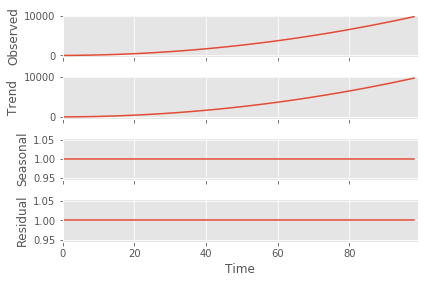

In [13]:
series = [i **2 for i in range(1, 100)]
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
plt.show()

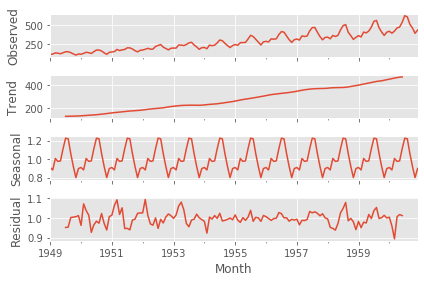

In [16]:
series = pd.read_csv('airline-passengers.csv',
                    header=0,
                    index_col=0,
                    parse_dates=True,
                    squeeze=True)
result = seasonal_decompose(series, model='multiplicative')
result.plot()
plt.show()

## Trend

A systmatic change in a time series that does not appear to be periodic is known as trend. 

faster modeling: the knowledge of a trend or lack of a trend
simpler problem: correct or remove the trend to simplify the modeling
more data: provide additional information using the trend information to improve the model performance.

### types of trends
1. deterministic trends: consistently increase or decrease
2. stochastic trends: increase and decrease inconsistently
3. global trends: apply to the whole time series
4. local trends: apply to parts of subsequences of a time series.


### detrend by differencing:

value(t) = observation(t) - observation(t-1)

In [19]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True,
                 squeeze=True, date_parser=parser)

/Users/daihongchen/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


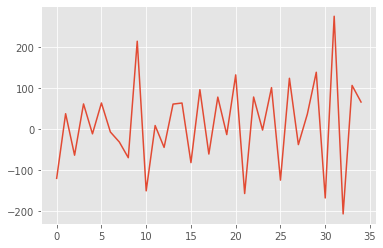

In [20]:
X = series.values
diff = list()

for i in range(1, len(X)):
    value = X[i] - X[i-1]
    diff.append(value)
plt.plot(diff)
plt.show()

### detrend by model fitting:
value(t) = observation(t) - prediction(t)

/Users/daihongchen/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  after removing the cwd from sys.path.


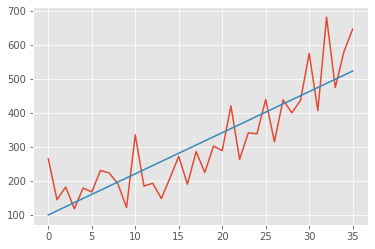

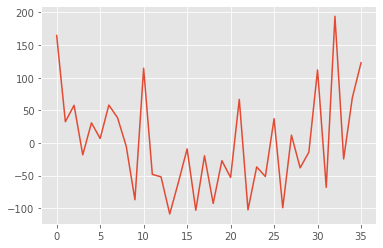

In [26]:
from sklearn.linear_model import LinearRegression

def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('shampoo-sales.csv',
                 header=0,
                 index_col=0,
                 parse_dates=True,
                 squeeze=True,
                 date_parser=parser)
X = [i for i in range(0, len(series))]
X = np.reshape(X, (len(X), 1))
y = series.values

model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(y)
plt.plot(trend)
plt.show()

detrend = [y[i] - trend[i]for i in range(0, len(series))]
plt.plot(detrend)
plt.show()

## Remove seasonality

a repeating pattern within a fixed period is known as seasonal variation. 
types of seasonality:
1. times of day
2. daily
3. weekly
4. monthly
5. yearly

Once seasonality is identified, can be removed, which is called seasonal adjustment, or deseasonalizing. A time series with a seasonal component removed called seasonal stationary. a time series with a clear seasonal component is refered to as non-stationary.

### Seasonal adjustment with differencing

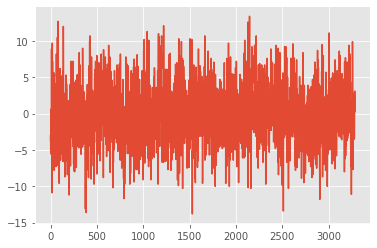

In [29]:
series = pd.read_csv('daily-minimum-temperatures.csv',
                    header=0,
                    index_col=0,
                    parse_dates=True,
                    squeeze=True)
X = series.values
days_in_year = 365
diff = list()
for i in range(days_in_year, len(X)):
    value = X[i] - X[i-days_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

In [32]:
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

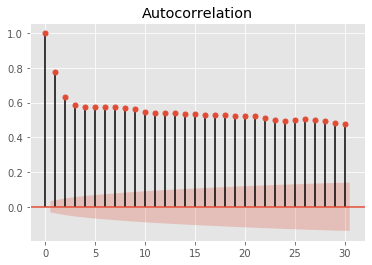

In [33]:
plot_acf(series, lags=30)
plt.show()

# ARIMA: Autoregressive Integrated Moving Average Model

AR: Autoregression. A model uses the dependent relationship between an observation and some number of lagged observations.

I: Integrated. The use of differencing of raw observations (eg, value(t)-value(t-1) in order to make the time series stationary.

MA: Moving Average. A model that uses the depnedency between an observation and a residual error from a moving average model applied to lagged observations.

### Parameters of ARIMA:
p: the oder of the lag. The number of lag observations included in the model. Lag order.

d: the number of steps needed for differencing to make the series statioanry, also called degree of differecing. 

q: The size of the moving average window, also called the order of moving average.